In [2]:
import os
import re

import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import Audio
from keras import layers
from keras import models
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.python.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
Ravdess = "input/Ravdess/audio_speech_actors_01-24/"
Crema = "input/Crema/"
Savee = "input/Savee/"
Tess = "input/Tess/"

Ravdess dataset

In [ ]:
ravdess_directory_list = os.listdir(Ravdess)

emotion_df = []

for dir in ravdess_directory_list:
    actor = os.listdir(os.path.join(Ravdess, dir))
    for wav in actor:
        info = wav.partition(".wav")[0].split("-")
        emotion = int(info[2])
        emotion_df.append((emotion, os.path.join(Ravdess, dir, wav)))

In [ ]:
Ravdess_df = pd.DataFrame.from_dict(emotion_df)
Ravdess_df.rename(columns={1 : "Path", 0 : "Emotion"}, inplace=True)

In [ ]:
Ravdess_df.Emotion.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

,Emotion,Path
0,neutral,input/Ravdess/audio_speech_actors_01-24/Actor_...
1,neutral,input/Ravdess/audio_speech_actors_01-24/Actor_...
2,disgust,input/Ravdess/audio_speech_actors_01-24/Actor_...
3,disgust,input/Ravdess/audio_speech_actors_01-24/Actor_...
4,disgust,input/Ravdess/audio_speech_actors_01-24/Actor_...


Crema dataset


In [ ]:
emotion_df = []

for wav in os.listdir(Crema):
    info = wav.partition(".wav")[0].split("_")
    if info[2] == 'SAD':
        emotion_df.append(("sad", Crema + wav))
    elif info[2] == 'ANG':
        emotion_df.append(("angry", Crema + wav))
    elif info[2] == 'DIS':
        emotion_df.append(("disgust", Crema + wav))
    elif info[2] == 'FEA':
        emotion_df.append(("fear", Crema + wav))
    elif info[2] == 'HAP':
        emotion_df.append(("happy", Crema + wav))
    elif info[2] == 'NEU':
        emotion_df.append(("neutral", Crema + wav))
    else:
        emotion_df.append(("unknown", Crema + wav))


Crema_df = pd.DataFrame.from_dict(emotion_df)
Crema_df.rename(columns={1 : "Path", 0 : "Emotion"}, inplace=True)

Crema_df.head()

,Emotion,Path
0,disgust,input/Crema/1063_ITS_DIS_XX.wav
1,happy,input/Crema/1017_TAI_HAP_XX.wav
2,sad,input/Crema/1052_IWW_SAD_XX.wav
3,happy,input/Crema/1026_IWL_HAP_XX.wav
4,neutral,input/Crema/1088_IEO_NEU_XX.wav


TESS dataset

In [ ]:
tess_directory_list = os.listdir(Tess)

emotion_df = []

for dir in tess_directory_list:
    for wav in os.listdir(os.path.join(Tess + dir)):
        info = wav.partition(".wav")[0].split("_")
        emo = info[2]
        if emo == "ps":
            emotion_df.append(("surprise", os.path.join(Tess, dir, wav)))
        else:
            emotion_df.append((emo, os.path.join(Tess, dir, wav)))


Tess_df = pd.DataFrame.from_dict(emotion_df)
Tess_df.rename(columns={1 : "Path", 0 : "Emotion"}, inplace=True)

Tess_df.head()

,Emotion,Path
0,sad,input/Tess/YAF_sad/YAF_voice_sad.wav
1,sad,input/Tess/YAF_sad/YAF_loaf_sad.wav
2,sad,input/Tess/YAF_sad/YAF_limb_sad.wav
3,sad,input/Tess/YAF_sad/YAF_tire_sad.wav
4,sad,input/Tess/YAF_sad/YAF_lean_sad.wav


In [ ]:
savee_directiory_list = os.listdir(Savee)

emotion_df = []

for wav in savee_directiory_list:
    info = wav.partition(".wav")[0].split("_")[1].replace(r"[0-9]", "")
    emotion = re.split(r"[0-9]", info)[0]
    if emotion=='a':
        emotion_df.append(("angry", Savee + wav))
    elif emotion=='d':
        emotion_df.append(("disgust", Savee + wav))
    elif emotion=='f':
        emotion_df.append(("fear", Savee + wav))
    elif emotion=='h':
        emotion_df.append(("happy", Savee + wav))
    elif emotion=='n':
        emotion_df.append(("neutral", Savee + wav))
    elif emotion=='sa':
        emotion_df.append(("sad", Savee + wav))
    else:
        emotion_df.append(("surprise", Savee + wav))


Savee_df = pd.DataFrame.from_dict(emotion_df)
Savee_df.rename(columns={1 : "Path", 0 : "Emotion"}, inplace=True)

Savee_df.head()

,Emotion,Path
0,sad,input/Savee/KL_sa15.wav
1,neutral,input/Savee/KL_n24.wav
2,disgust,input/Savee/JE_d06.wav
3,angry,input/Savee/DC_a04.wav
4,disgust,input/Savee/KL_d04.wav


In [ ]:
df = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis=0)
df.shape

(12162, 2)

In [ ]:
df.head()

,Emotion,Path
0,neutral,input/Ravdess/audio_speech_actors_01-24/Actor_...
1,neutral,input/Ravdess/audio_speech_actors_01-24/Actor_...
2,disgust,input/Ravdess/audio_speech_actors_01-24/Actor_...
3,disgust,input/Ravdess/audio_speech_actors_01-24/Actor_...
4,disgust,input/Ravdess/audio_speech_actors_01-24/Actor_...


### Exploratory data analysis


In [ ]:
%matplotlib inline

plt.style.use("ggplot")

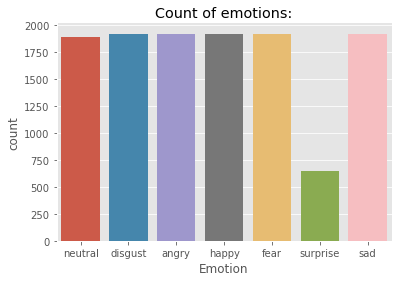

In [ ]:
plt.title("Count of emotions:")
sns.countplot(x=df["Emotion"])
sns.despine(top=True, right=True, left=False, bottom=False)

In [ ]:
def replace_emotion_to_three_classes(emotion):
    if emotion in {"sad", "fear", "angry", "disgust"}:
        return "sad"
    elif emotion == "happy":
        return "positive"
    else: return "neutral"

In [ ]:
df["Emotion"] = df["Emotion"].apply(replace_emotion_to_three_classes)

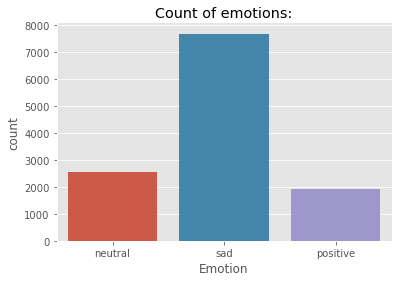

In [ ]:
plt.title("Count of emotions:")
sns.countplot(x=df["Emotion"])
sns.despine(top=True, right=True, left=False, bottom=False)

### Data augmentation

In [ ]:
def noise(data, random=False, rate=0.035, threshold=0.075):
    if random:
        rate = np.random.random() * threshold
    noise_amp = rate*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data, rate=1000):
    shift_range = int(np.random.uniform(low=-5, high = 5)*rate)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7, random=False):
    if random:
        pitch_factor=np.random.random() * pitch_factor
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

In [ ]:
df.head()

,Emotion,Path
0,neutral,input/Ravdess/audio_speech_actors_01-24/Actor_...
1,neutral,input/Ravdess/audio_speech_actors_01-24/Actor_...
2,sad,input/Ravdess/audio_speech_actors_01-24/Actor_...
3,sad,input/Ravdess/audio_speech_actors_01-24/Actor_...
4,sad,input/Ravdess/audio_speech_actors_01-24/Actor_...


In [ ]:
path = np.array(df.Path)[100]
data, sampling_rate = librosa.load(path)

1. Simple audio

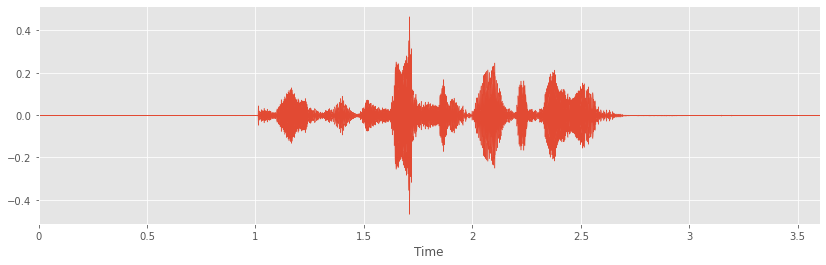

In [ ]:
plt.figure(figsize=(14,4))
librosa.display.waveplot(data, sampling_rate)
Audio(path)

2. Noised audio

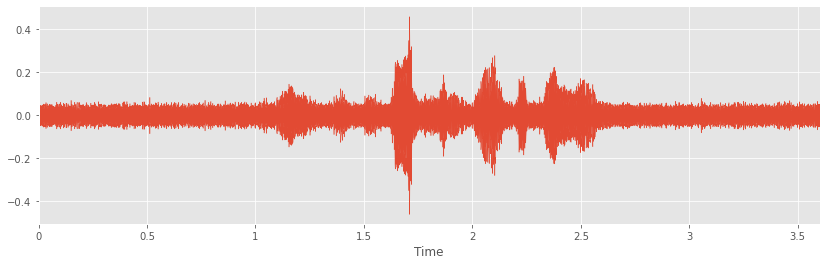

In [ ]:
noised_data = noise(data, random=True)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=noised_data, sr=sampling_rate)
Audio(noised_data, rate=sampling_rate)


3. Stretching


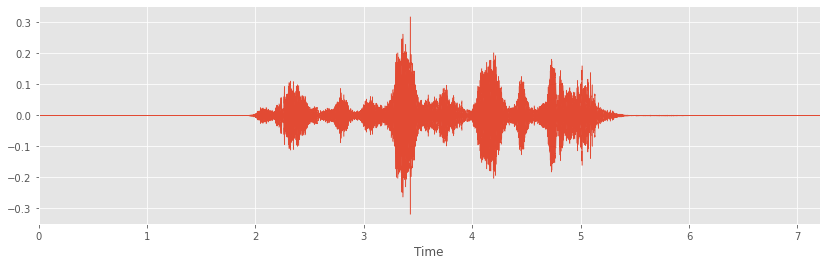

In [ ]:
stretched_data = stretch(data, rate=0.5)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=stretched_data, sr=sampling_rate)
Audio(stretched_data, rate=sampling_rate)


4. Shifting


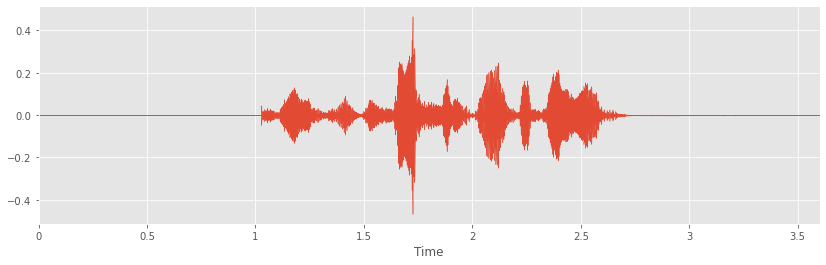

In [ ]:
shifted_data = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=shifted_data, sr=sampling_rate)
Audio(shifted_data, rate=sampling_rate)


    5. Pitching

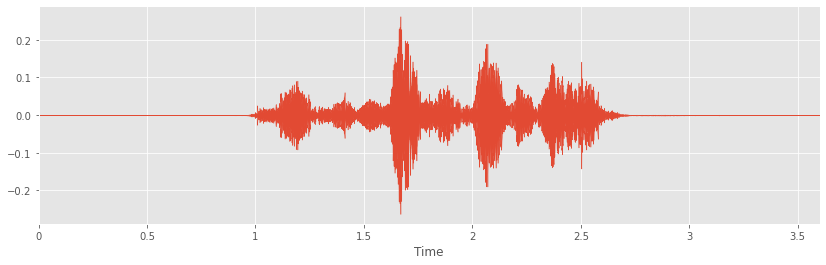

In [ ]:
pitched_data = pitch(data, sampling_rate, pitch_factor=0.5, random=True)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=pitched_data, sr=sampling_rate)
Audio(pitched_data, rate=sampling_rate)

For data augmentation we will use noise and pitch


### Feature extraction

#### Features which may be useful:

1. Zero Crossing Rate : The rate of sign-changes of the signal during the duration of a particular frame.
2. Energy : The sum of squares of the signal values, normalized by the respective frame length.
3. Entropy of Energy :The entropy of sub-frames’ normalized energies. It can be interpreted as a measure of abrupt changes.
3. Spectral Centroid : The center of gravity of the spectrum.
4. Spectral Spread : The second central moment of the spectrum.
5. Spectral Entropy : Entropy of the normalized spectral energies for a set of sub-frames.
6. Spectral Flux : The squared difference between the normalized magnitudes of the spectra of the two successive frames.
7. Spectral Rolloff : The frequency below which 90% of the magnitude distribution of the spectrum is concentrated.
8. MFCCs Mel Frequency Cepstral Coefficients form a cepstral representation where the frequency bands are not linear but distributed according to the mel-scale.

In [ ]:
n_fft = 2048
hop_length = 512

In [ ]:
def chunks(data, frame_length, hop_length):
    for i in range(0, len(data), hop_length):
        yield data[i:i+frame_length]

# Zero Crossing Rate
def zcr(data, frame_length=2048, hop_length=512):
    zcr = librosa.feature.zero_crossing_rate(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(zcr)


def energy(data, frame_length=2048, hop_length=512):
    en = np.array([np.sum(np.power(np.abs(data[hop:hop+frame_length]), 2)) for hop in range(0, data.shape[0], hop_length)])
    return en / frame_length


def rmse(data, frame_length=2048, hop_length=512):
    rmse = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rmse)


def entropy_of_energy(data, frame_length=2048, hop_length=512):
    energies = energy(data, frame_length, hop_length)
    energies /= np.sum(energies)

    entropy = 0.0
    entropy -= energies * np.log2(energies)
    return entropy


def spc(data, sr, frame_length=2048, hop_length=512):
    spectral_centroid = librosa.feature.spectral_centroid(y=data, sr=sr, n_fft=frame_length, hop_length=hop_length)
    return np.squeeze(spectral_centroid)


# def spc_entropy(data, sr):
#     spc_en = spectral_entropy(data, sf=sr, method="fft")
#     return spc_en

def spc_flux(data):
    isSpectrum = data.ndim == 1
    if isSpectrum:
        data = np.expand_dims(data, axis=1)

    X = np.c_[data[:, 0], data]
    af_Delta_X = np.diff(X, 1, axis=1)
    vsf = np.sqrt((np.power(af_Delta_X, 2).sum(axis=0))) / X.shape[0]

    return np.squeeze(vsf) if isSpectrum else vsf


def spc_rollof(data, sr, frame_length=2048, hop_length=512):
    spcrollof = librosa.feature.spectral_rolloff(y=data, sr=sr, n_fft=frame_length, hop_length=hop_length)
    return np.squeeze(spcrollof)


def chroma_stft(data, sr, frame_length=2048, hop_length=512, flatten: bool = True):
    stft = np.abs(librosa.stft(data))
    chroma_stft = librosa.feature.chroma_stft(S=stft, sr=sr)
    return np.squeeze(chroma_stft.T) if not flatten else np.ravel(chroma_stft.T)


def mel_spc(data, sr, frame_length=2048, hop_length=512, flatten: bool = True):
    mel = librosa.feature.melspectrogram(y=data, sr=sr)
    return np.squeeze(mel.T) if not flatten else np.ravel(mel.T)

def mfcc(data, sr, frame_length=2048, hop_length=512, flatten: bool = True):
    mfcc_feature = librosa.feature.mfcc(y=data, sr=sr)
    return np.squeeze(mfcc_feature.T) if not flatten else np.ravel(mfcc_feature.T)

#### Let's check data formats:

In [ ]:
path = np.array(df["Path"])[658]
data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
len(data)

55125

In [ ]:
print("ZCR: ", zcr(data).shape)
# print("Energy: ", energy(data).shape)
# print("Entropy of Energy :", entropy_of_energy(data).shape)
print("RMS :", rmse(data).shape)
# print("Spectral Centroid :", spc(data, sampling_rate).shape)
# print("Spectral Entropy: ", spc_entropy(data, sampling_rate).shape)
# print("Spectral Flux: ", spc_flux(data).shape)
# print("Spectral Rollof: ", spc_rollof(data, sampling_rate).shape)
# print("Chroma STFT: ", chroma_stft(data, sampling_rate).shape)
# print("MelSpectrogram: ", mel_spc(data, sampling_rate).shape)
print("MFCC: ", mfcc(data, sampling_rate).shape)


ZCR:  (108,)
RMS : (108,)
MFCC:  (2160,)


In [ ]:
def extract_features(data, sr, frame_length=2048, hop_length=512):
    result = np.array([])
    result = np.hstack((result,
                        zcr(data, frame_length, hop_length),
                        # np.mean(energy(data, frame_length, hop_length),axis=0),
                        # np.mean(entropy_of_energy(data, frame_length, hop_length), axis=0),
                        rmse(data, frame_length, hop_length),
                        # spc(data, sr, frame_length, hop_length),
                        # spc_entropy(data, sr),
                        # spc_flux(data),
                        # spc_rollof(data, sr, frame_length, hop_length),
                        # chroma_stft(data, sr, frame_length, hop_length),
                        # mel_spc(data, sr, frame_length, hop_length, flatten=True)
                        mfcc(data, sr, frame_length, hop_length)
                                    ))
    return result

In [ ]:
def get_features(path, duration=2.5, offset=0.6):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=duration, offset=offset)

     # without augmentation
    res1 = extract_features(data, sample_rate)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data, random=True)
    res2 = extract_features(noise_data, sample_rate)
    result = np.vstack((result, res2)) # stacking vertically

    # data with pitching
    pitched_data = pitch(data, sample_rate, random=True)
    res3 = extract_features(pitched_data, sample_rate)
    result = np.vstack((result, res3)) # stacking vertically

    # data with pitching and white_noise
    new_data = pitch(data, sample_rate, random=True)
    data_noise_pitch = noise(new_data, random=True)
    res3 = extract_features(data_noise_pitch, sample_rate)
    result = np.vstack((result, res3)) # stacking vertically

    return result


In [ ]:
X, Y = [], []
print("Feature processing...")
for path, emotion, ind in zip(df.Path, df.Emotion, range(df.Path.shape[0])):
    features = get_features(path)
    if ind % 100 == 0:
        print(f"{ind} samples has been processed...")
    for ele in features:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)
print("Done.")

Feature processing...
0 samples has been processed...
100 samples has been processed...
200 samples has been processed...
300 samples has been processed...
400 samples has been processed...
500 samples has been processed...
600 samples has been processed...
700 samples has been processed...
800 samples has been processed...
900 samples has been processed...
1000 samples has been processed...
1100 samples has been processed...
1200 samples has been processed...
1300 samples has been processed...
1400 samples has been processed...
1500 samples has been processed...
1600 samples has been processed...
1700 samples has been processed...
1800 samples has been processed...
1900 samples has been processed...
2000 samples has been processed...
2100 samples has been processed...
2200 samples has been processed...
2300 samples has been processed...
2400 samples has been processed...
2500 samples has been processed...
2600 samples has been processed...
2700 samples has been processed...
2800 sampl

In [3]:
features_path = "/content/drive/MyDrive/Datasets/speech_emotion_recognition/features/features.csv"

extracted_df = pd.DataFrame(X)
extracted_df["labels"] = Y
extracted_df.to_csv(features_path, index=False)
extracted_df.head()

NameError: ignored

In [4]:
extracted_df = pd.read_csv(features_path)
print(extracted_df.shape)

(48648, 2377)


In [5]:
extracted_df = extracted_df.fillna(0)
print(extracted_df.isna().any())
extracted_df.shape


0         False
1         False
2         False
3         False
4         False
          ...  
2372      False
2373      False
2374      False
2375      False
labels    False
Length: 2377, dtype: bool


(48648, 2377)

In [6]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [7]:
extracted_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2337,2338,2339,2340,2341,2342,2343,2344,2345,2346,2347,2348,2349,2350,2351,2352,2353,2354,2355,2356,2357,2358,2359,2360,2361,2362,2363,2364,2365,2366,2367,2368,2369,2370,2371,2372,2373,2374,2375,labels
0,0.184570,0.341309,0.432617,0.397949,0.394531,0.314453,0.374023,0.336426,0.421387,0.373047,0.234863,0.295898,0.254883,0.327148,0.377930,0.383789,0.332031,0.312012,0.313965,0.230469,0.167480,0.104004,0.048340,0.043945,0.062012,0.080566,0.081543,0.083496,0.065430,0.041016,0.058594,0.144043,0.177734,0.178711,0.163574,0.090820,0.067383,0.076172,0.080078,0.073242,...,19.015471,14.582802,12.328218,10.734264,7.957288,5.709467,4.905242,5.390866,6.555644,7.146960,6.107903,4.719006,4.638032,5.145736,4.119188,2.378329,2.493585,3.781225,3.480479,-889.510864,23.373589,17.278500,13.426573,13.120591,13.129873,9.054956,8.560216,7.584674,9.073332,7.644012,6.987724,8.173986,5.318121,4.844069,2.739438,3.351856,2.475674,1.313508,2.207652,neutral
1,0.258301,0.389648,0.513184,0.502441,0.488281,0.489746,0.494141,0.506348,0.509277,0.499023,0.481445,0.490234,0.488281,0.494629,0.517090,0.501465,0.468750,0.433105,0.398926,0.297852,0.220215,0.152832,0.065918,0.077148,0.122559,0.133301,0.133301,0.121094,0.100586,0.115234,0.167969,0.251465,0.294922,0.258789,0.212402,0.139648,0.086914,0.099609,0.112305,0.143555,...,-2.883480,-0.192579,-1.535926,-2.249443,-3.755314,-0.998840,-6.985239,-1.373200,-0.177217,-1.461264,0.077024,0.867603,-1.640277,-6.132422,-1.072099,0.066702,-1.285242,-2.221072,-4.113467,-560.208543,-9.350712,-4.462837,-0.615610,0.915279,-2.852772,-0.991396,-6.137817,-1.149154,3.977499,0.969854,-2.286486,0.259035,1.352969,-2.957713,1.902826,1.077414,1.606099,4.503545,2.706930,neutral
2,0.114746,0.145020,0.163574,0.093750,0.080078,0.069824,0.062012,0.060059,0.049316,0.043945,0.041992,0.046875,0.057617,0.084473,0.117188,0.151367,0.192383,0.195312,0.178223,0.138672,0.097656,0.071289,0.059570,0.056152,0.061523,0.064453,0.061523,0.062012,0.055664,0.062012,0.099609,0.159180,0.169434,0.157715,0.128906,0.081055,0.082031,0.084961,0.085938,0.079102,...,12.558093,12.196453,11.629314,10.902334,10.066401,9.169655,8.252120,7.344285,6.468925,5.645011,4.891226,4.227746,3.675248,3.251781,2.968744,2.827747,2.819309,2.924524,3.117743,-903.504028,11.310317,11.028706,10.581903,10.000438,9.321133,8.582670,7.821507,7.068958,6.349707,5.681942,5.078579,4.549140,4.101501,3.742995,3.480374,3.318716,3.259481,3.298491,3.424082,neutral
3,0.152344,0.197754,0.220215,0.134277,0.108398,0.082520,0.069824,0.073730,0.061035,0.052246,0.052734,0.048828,0.067383,0.103516,0.132324,0.162109,0.192871,0.186035,0.170898,0.131836,0.090332,0.069824,0.060547,0.052734,0.065430,0.063477,0.062012,0.066406,0.046875,0.045410,0.083008,0.140625,0.159668,0.156738,0.122559,0.087891,0.085938,0.093750,0.093262,0.069824,...,16.829421,12.623507,11.190847,10.911611,9.660776,7.604154,6.364773,6.860277,7.908528,8.138811,6.832565,4.954584,4.753688,4.569912,2.987975,1.699075,1.881920,3.360706,4.782011,-936.866552,15.905427,12.264232,10.939783,11.251208,10.329363,7.488305,5.135383,5.216424,6.431337,6.369380,5.282159,4.405564,3.709064,3.287346,3.137086,3.048205,3.162834,3.514159,4.003108,neutral
4,0.134766,0.231934,0.323242,0.384277,0.456543,0.502930,0.512695,0.474121,0.475586,0.436523,0.461426,0.526855,0.545898,0.570312,0.547852,0.481934,0.387695,0.307617,0.214355,0.131348,0.085938,0.046875,0.049316,0.082520,0.115234,0.118164,0.110840,0.082520,0.048828,0.078125,0.126465,0.117188,0.117188,0.091309,0.056641,0.065430,0.069824,0.071777,0.074219,0.101562,...,2.209964,2.205606,2.198351,2.188234,2.175278,2.159535,2.141046,2.119884,2.096100,2.069788,2.041023,2.009902,1.976520,1.940987,1.903411,1.863915,1.822613,1.779640,1.735124,-918.754333,1.828053,1.725700,1.630869,1.578776,1.548309,1.497805,1.422297,1.368250,1.388288,1.483778,1.597508,1.665243,1.672495,1.657387,1.658891,1.668102,1.636357,1.531671,1.381910

### Data preparation

As of now we have extracted the data, now we need to normalize and split our data for training and testing.


In [29]:
X = extracted_df.drop(labels="labels", axis=1)
Y = extracted_df["labels"]

In [30]:
lb = LabelEncoder()
Y = np_utils.to_categorical(lb.fit_transform(Y))
print(lb.classes_)
Y


['neutral' 'positive' 'sad']


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((38918, 2376), (9730, 2376), (38918, 3), (9730, 3))

In [32]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42, test_size=0.1, shuffle=True)
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((35026, 2376), (9730, 2376), (3892, 2376), (35026, 3), (9730, 3), (3892, 3))

In [33]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((35026, 2376), (9730, 2376), (3892, 2376), (35026, 3), (9730, 3), (3892, 3))

In [34]:
X_train = np.expand_dims(X_train, axis=2)
X_val = np.expand_dims(X_val, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape

(35026, 2376, 1)

In [49]:
earlystopping = EarlyStopping(monitor ="val_acc",
                              mode = 'auto', patience = 5,
                              restore_best_weights = True)


In [50]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=3,
                                            verbose=1,
                                            factor=0.3,
                                            min_lr=0.00001)

In [51]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [52]:
model = models.Sequential()
model.add(layers.Conv1D(512, kernel_size=5, strides=1,
                        padding="same", activation="relu",
                        input_shape=(X_train.shape[1], 1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool1D(pool_size=5, strides=2, padding="same"))

model.add(layers.Conv1D(512, kernel_size=5, strides=1,
                        padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool1D(pool_size=5, strides=2, padding="same"))

model.add(layers.Conv1D(256, kernel_size=5, strides=1,
                        padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool1D(pool_size=5, strides=2, padding="same"))

model.add(layers.Conv1D(256, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(layers.Conv1D(128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D(pool_size=3, strides = 2, padding = 'same'))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(3, activation="softmax"))

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["acc", f1_m])



In [53]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_20 (Conv1D)           (None, 2376, 512)         3072      
_________________________________________________________________
batch_normalization_6 (Batch (None, 2376, 512)         2048      
_________________________________________________________________
max_pooling1d_20 (MaxPooling (None, 1188, 512)         0         
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 1188, 512)         1311232   
_________________________________________________________________
batch_normalization_7 (Batch (None, 1188, 512)         2048      
_________________________________________________________________
max_pooling1d_21 (MaxPooling (None, 594, 512)          0         
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 594, 256)         

In [54]:
EPOCHS = 50
batch_size = 128

In [55]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=EPOCHS,
                    callbacks=[earlystopping, learning_rate_reduction])

Epoch 1/50
1095/1095 [==============================] - 187s 168ms/step - loss: 1.0761 - acc: 0.6021 - f1_m: 0.5766 - val_loss: 0.7705 - val_acc: 0.6650 - val_f1_m: 0.6574
Epoch 2/50
1095/1095 [==============================] - 183s 168ms/step - loss: 0.6809 - acc: 0.7141 - f1_m: 0.7037 - val_loss: 0.6922 - val_acc: 0.6994 - val_f1_m: 0.6913
Epoch 3/50
1095/1095 [==============================] - 183s 167ms/step - loss: 0.6084 - acc: 0.7366 - f1_m: 0.7272 - val_loss: 0.7376 - val_acc: 0.6953 - val_f1_m: 0.6889
Epoch 4/50
1095/1095 [==============================] - 183s 167ms/step - loss: 0.5498 - acc: 0.7635 - f1_m: 0.7580 - val_loss: 0.6043 - val_acc: 0.7441 - val_f1_m: 0.7413
Epoch 5/50
1095/1095 [==============================] - 183s 167ms/step - loss: 0.4958 - acc: 0.7874 - f1_m: 0.7833 - val_loss: 0.5486 - val_acc: 0.7634 - val_f1_m: 0.7632
Epoch 6/50
1095/1095 [==============================] - 183s 167ms/step - loss: 0.4529 - acc: 0.8089 - f1_m: 0.8066 - val_loss: 0.5011 - val

305/305 [==============================] - 13s 44ms/step - loss: 0.2057 - acc: 0.9655 - f1_m: 0.9658
Accuracy of our model on test data :  96.5467631816864 %


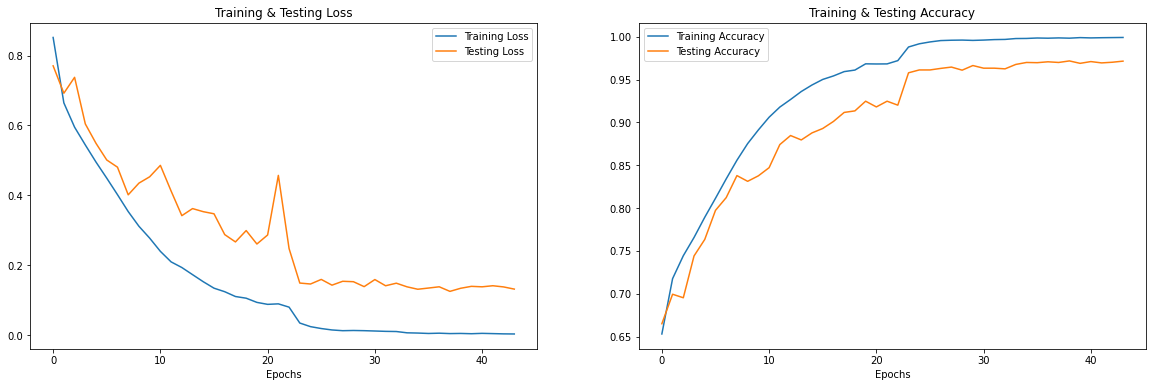

In [57]:
print("Accuracy of our model on test data : " , model.evaluate(X_test,y_test)[1]*100 , "%")

epochs = [i for i in range(44)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['acc']
train_loss = history.history['loss']
test_acc = history.history['val_acc']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()


In [59]:
path_to_model = "/content/drive/MyDrive/Datasets/speech_emotion_recognition/features/model_with_MFCC_0.965.h5"

model.save(path_to_model)